In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [ ]:
data = pd.read_csv('../input/feature-engineering-house-rent-prediction//data_cleaned.csv')
data.shape

(229505, 26)

In [ ]:
data.head()

,region,price,type,sqfeet,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,...,has_pool,has_grill,has_fireplace,gym_nearby,school/clg_nearby,wifi_facilities,valet_service,shopping_nearby,sports_playground,dining_nearby
0,3.0,7.021084,3.0,7.184629,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,3.0,6.715383,3.0,7.032624,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2,3.0,6.684612,3.0,6.831954,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3,3.0,6.665684,3.0,6.953684,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
4,3.0,6.802395,3.0,7.168580,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                    data.drop('price',axis=1),
                                    data['price'],
                                    test_size=0.25,
                                    random_state=0)

***Data Split 1: all of our final dataset, no scaling***

In [ ]:
y = data['price']
X = data.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

***Data Split 2: all of our final dataset, with scaling***

In [ ]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

***Model Training***

In [ ]:
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

***Predictions***

In [ ]:
lm1_pred = lm1.predict(X_test)
lm2_pred = lm2.predict(X2_test)

***Evaluation***

Linear Regression Performance:

all features, No scaling:
MAE: 0.26568055036883115
RMSE: 0.4466787722707824
R2_Score:  0.14582083033688886

all features, with scaling:
MAE: 0.2654287512445197
RMSE: 0.44662414039696413
R2_Score:  0.14602976148724744


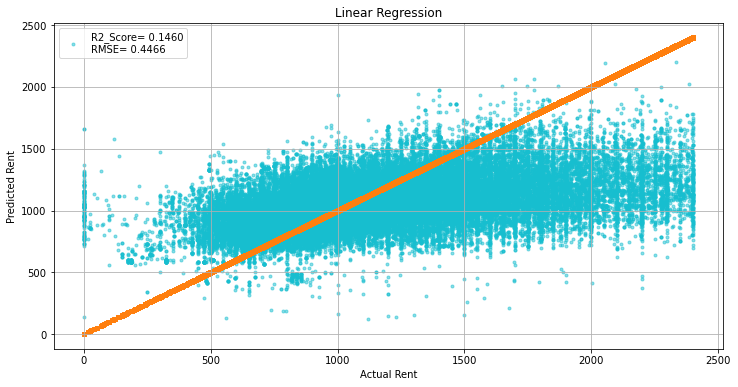

In [ ]:
print('Linear Regression Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, lm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, lm1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, lm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, lm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, lm2_pred))

pred = pd.DataFrame(data={'Predicted_Rent': np.exp(lm2_pred), 'Actual_Rent': np.exp(y2_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha=0.5)
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y2_test, lm2_pred),
                np.sqrt(metrics.mean_squared_error(y2_test, lm2_pred)))
           ],
           loc='best')
plt.title('Linear Regression')
plt.grid()
plt.show()